In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [109]:
data=pd.read_csv("D:\jupyter notebook projects\Data\Position_Salaries.csv")

In [110]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [111]:
data.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


<AxesSubplot:>

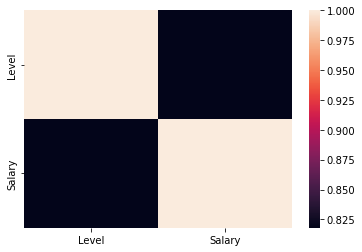

In [112]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='Level', ylabel='Salary'>

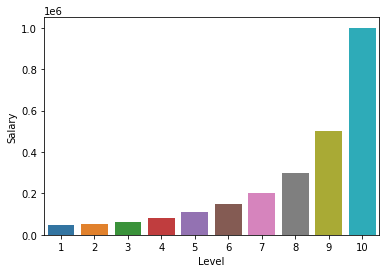

In [144]:
sns.barplot(data=data,x='Level',y='Salary')

<AxesSubplot:xlabel='Level', ylabel='Salary'>

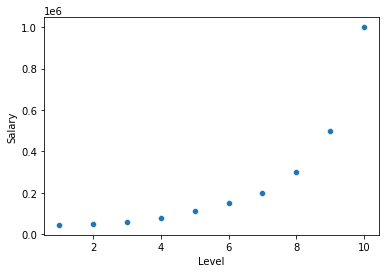

In [145]:
sns.scatterplot(x=data.Level,y=data.Salary)

In [146]:
#the data non linear
#when level increase,salary incr


## spliting data

In [151]:
x=data.iloc[:,1].values.reshape(-1,1)
y=data.iloc[:,-1].values


In [152]:
# data is too small to split tarin and test


## train model

In [153]:
from sklearn.linear_model import LinearRegression
lr1=LinearRegression()
lr1.fit(x,y)

LinearRegression()

In [154]:
## ploting data


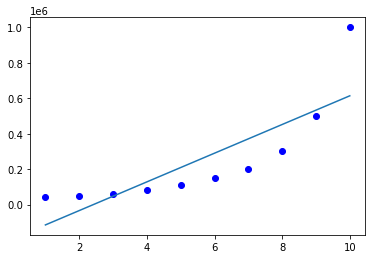

In [155]:
plt.scatter(x,y,color='blue')
plt.plot(x,lr1.predict(x))
plt.show()

In [156]:
## the data non linear we need to use polynomial

In [157]:
from sklearn.preprocessing import PolynomialFeatures

In [165]:
poly=PolynomialFeatures(degree=4)
x_poly=poly.fit_transform(x)
poly.fit(x_poly,y)

PolynomialFeatures(degree=4)

In [166]:
lr2=LinearRegression()
lr2.fit(x_poly,y)

LinearRegression()

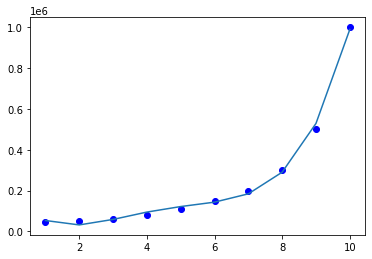

In [167]:
plt.scatter(x,y,color='blue')
plt.plot(x,lr2.predict(x_poly))
plt.show()

# make a curve more smoother for higher resolution

In [168]:
x_grid=np.arange(min(x),max(x),0.1)
x_grid=x_grid.reshape(len(x_grid),1)

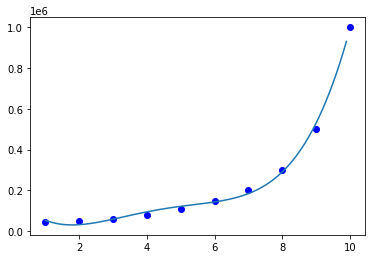

In [169]:

plt.scatter(x,y,color='blue')
plt.plot(x_grid,lr2.predict(poly.fit_transform(x_grid)))
plt.show()

# #prediction

In [179]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [180]:
lr2.predict(poly.fit_transform([[3.2]]))

array([65995.51515154])

In [181]:
x_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])